# Docker: краткий обзор

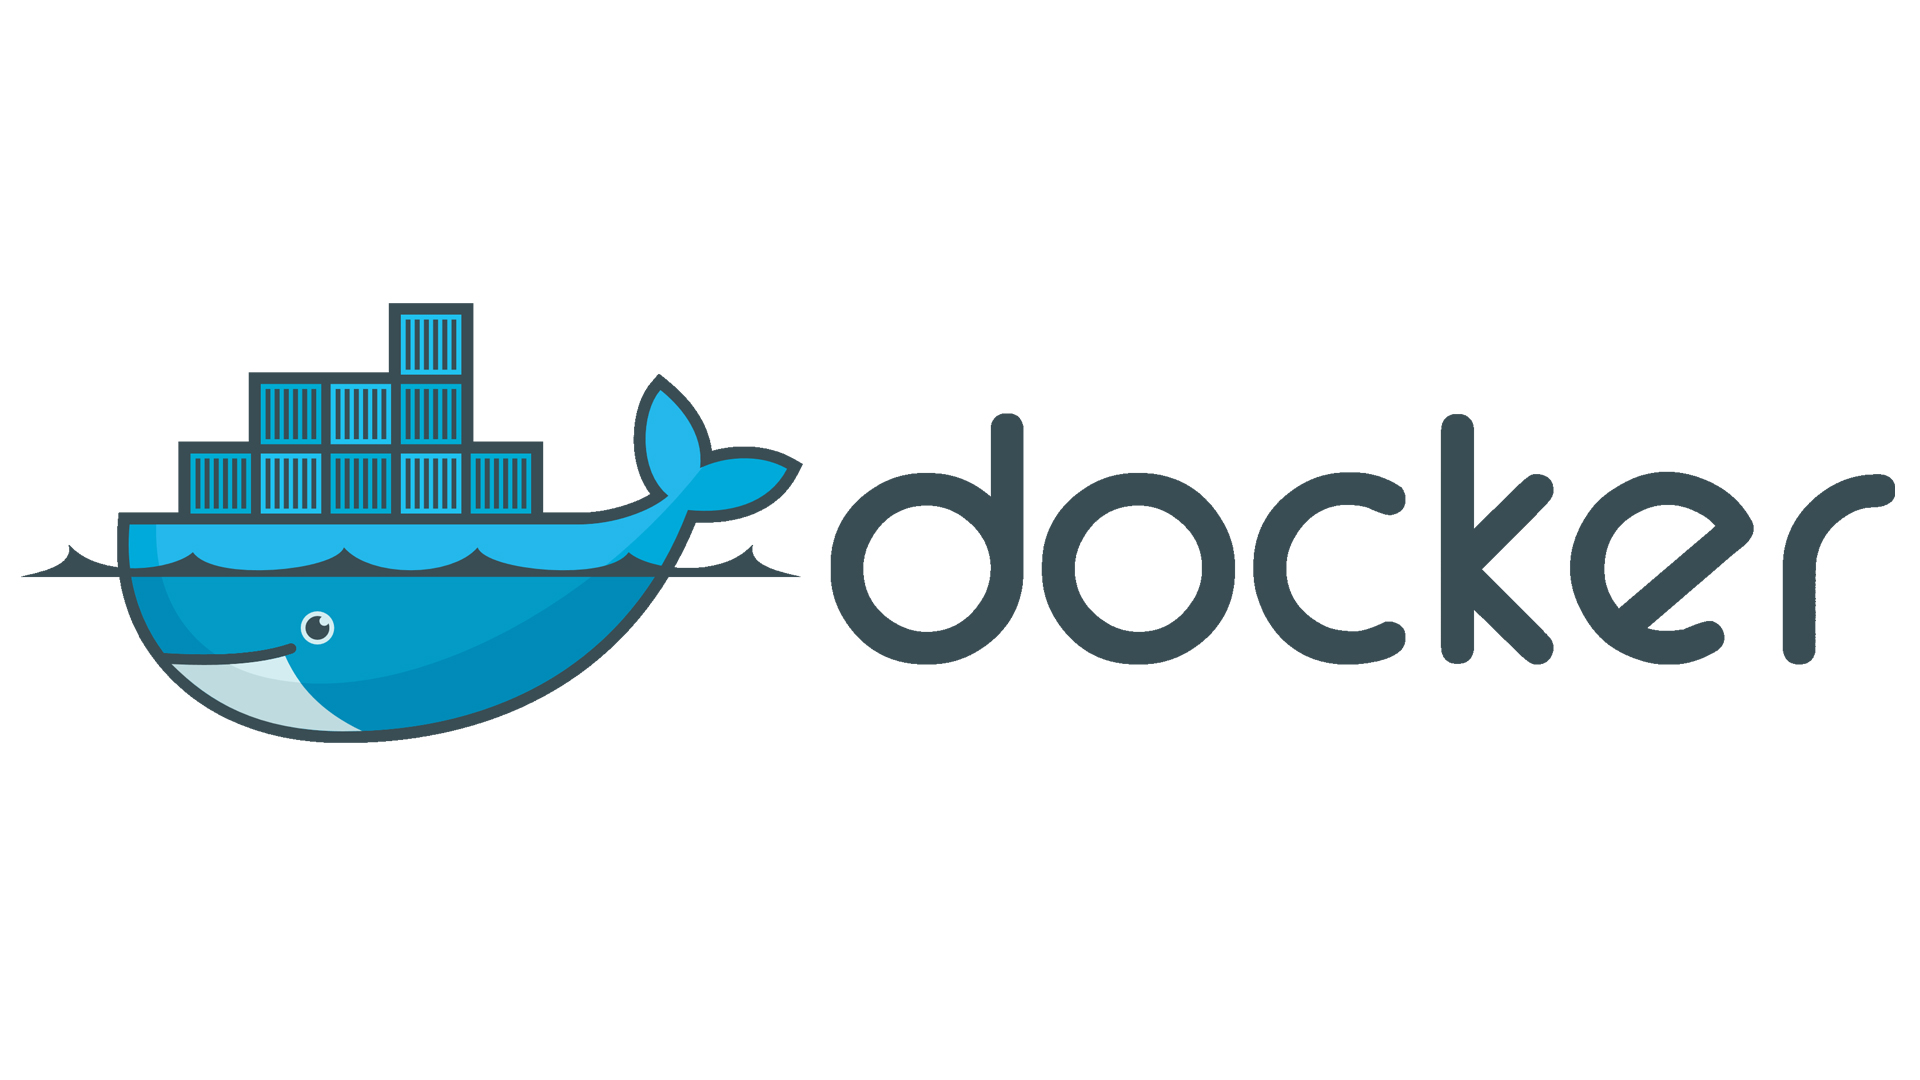

**Docker** — это платформа для контейнеризации, которая позволяет упаковывать приложения и их зависимости в изолированные контейнеры. Это облегчает развертывание и переносимость приложений между различными средами, будь то локальный компьютер, сервер или облако.  

## Основные преимущества Docker  
- **Легковесность** – контейнеры используют общее ядро ОС, что делает их легче виртуальных машин.  
- **Изоляция** – каждое приложение работает в своем контейнере, не мешая другим.  
- **Портативность** – контейнеры работают одинаково на любом устройстве с установленным Docker.  
- **Быстрое развертывание** – контейнеры запускаются за секунды, что ускоряет разработку и CI/CD.  
- **Гибкость** – можно легко масштабировать и управлять контейнерами с помощью Docker Compose и Kubernetes.  

## Основные компоненты Docker  
- **Docker Engine** – среда выполнения контейнеров.  
- **Docker Image** – образ контейнера с приложением и его зависимостями.  
- **Docker Container** – запущенный экземпляр образа.  
- **Docker Hub** – репозиторий для хранения и распространения образов.  

Docker широко используется в **DevOps**, облачных вычислениях и **микросервисной архитектуре**, упрощая разработку и эксплуатацию приложений.

## Контейнер - центральное понятие
Как и обычный пластиковый контейнер, контейнер Docker обладает следующими характеристиками:

- **В нём можно что-то хранить.** Нечто может находиться либо в контейнере, либо за его пределами.
- **Его можно переносить.** Контейнер Docker можно использовать на локальном компьютере, на компьютере коллеги, на сервере поставщика облачных услуг (вроде AWS). Это роднит контейнеры Docker с обычными контейнерами, в которых, например, перевозят разные милые сердцу безделушки при переезде в новый дом.
- **В контейнер удобно что-то класть и удобно что-то из него вынимать.** У обычного контейнера есть крышка на защёлках, которую надо снять для того, чтобы что-то положить в контейнер или что-то из него вынуть. У контейнеров Docker есть нечто подобное, представляющее их интерфейс, то есть — **Имеется механизмы, позволяющие им взаимодействовать с внешним миром.** Например, у контейнера есть порты, которые можно открывать для того, чтобы к приложению, работающему в контейнере, можно было бы обращаться из браузера. Работать с контейнером можно и средствами командной строки.
- **Если вам нужен контейнер, его можно заказать в интернет-магазине.** Пустой контейнер можно купить, например, на сайте Amazon. В этот магазин контейнеры попадают от производителей, которые делают их в огромных количествах, используя пресс-формы. В случае с контейнерами Docker то, что можно сравнить с пресс-формой, а именно — образ контейнера, хранится в специальном репозитории. Если вам нужен некий контейнер, вы можете загрузить из репозитория соответствующий образ, и, используя его, этот контейнер создать.

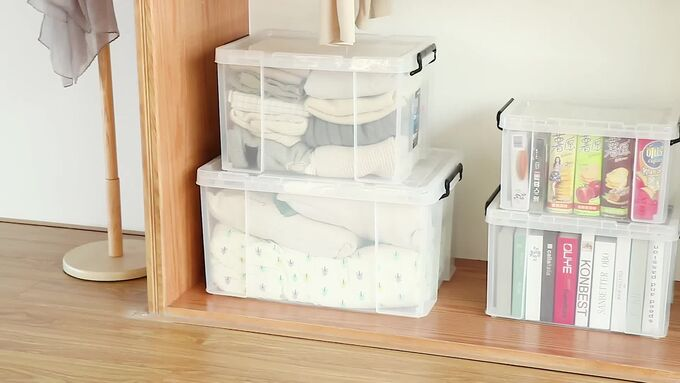

## Концепции Docker


### Виртуальные машины
Предшественниками контейнеров Docker были виртуальные машины. Виртуальная машина, как и контейнер, изолирует от внешней среды приложение и его зависимости. Однако контейнеры Docker обладают преимуществами перед виртуальными машинами. Так, они потребляют меньше ресурсов, их очень легко переносить, они быстрее запускаются и приходят в работоспособное состояние.

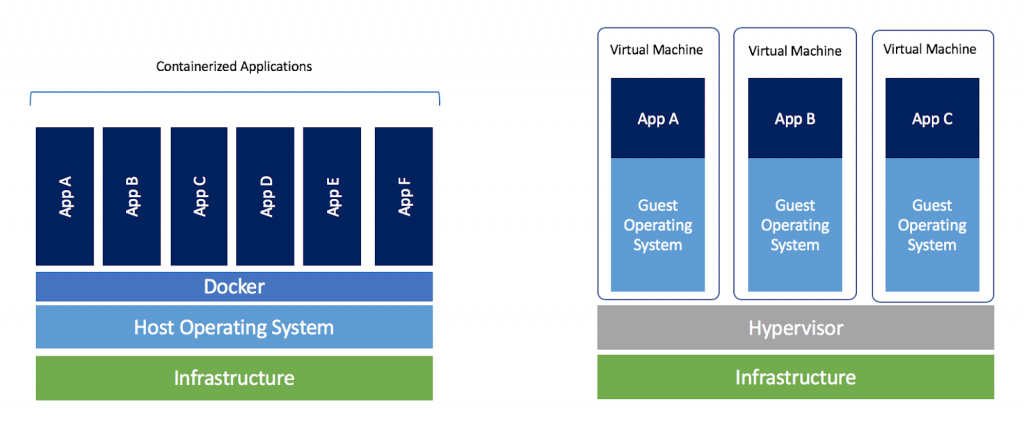

### Образ контейнера Docker
Образы — это неизменные шаблоны, которые используются для создания одинаковых контейнеров. 
В образе контейнера Docker содержится образ базовой операционной системы, код приложения, библиотеки, от которого оно зависит. Всё это скомпоновано в виде единой сущности, на основе которой можно создать контейнер.


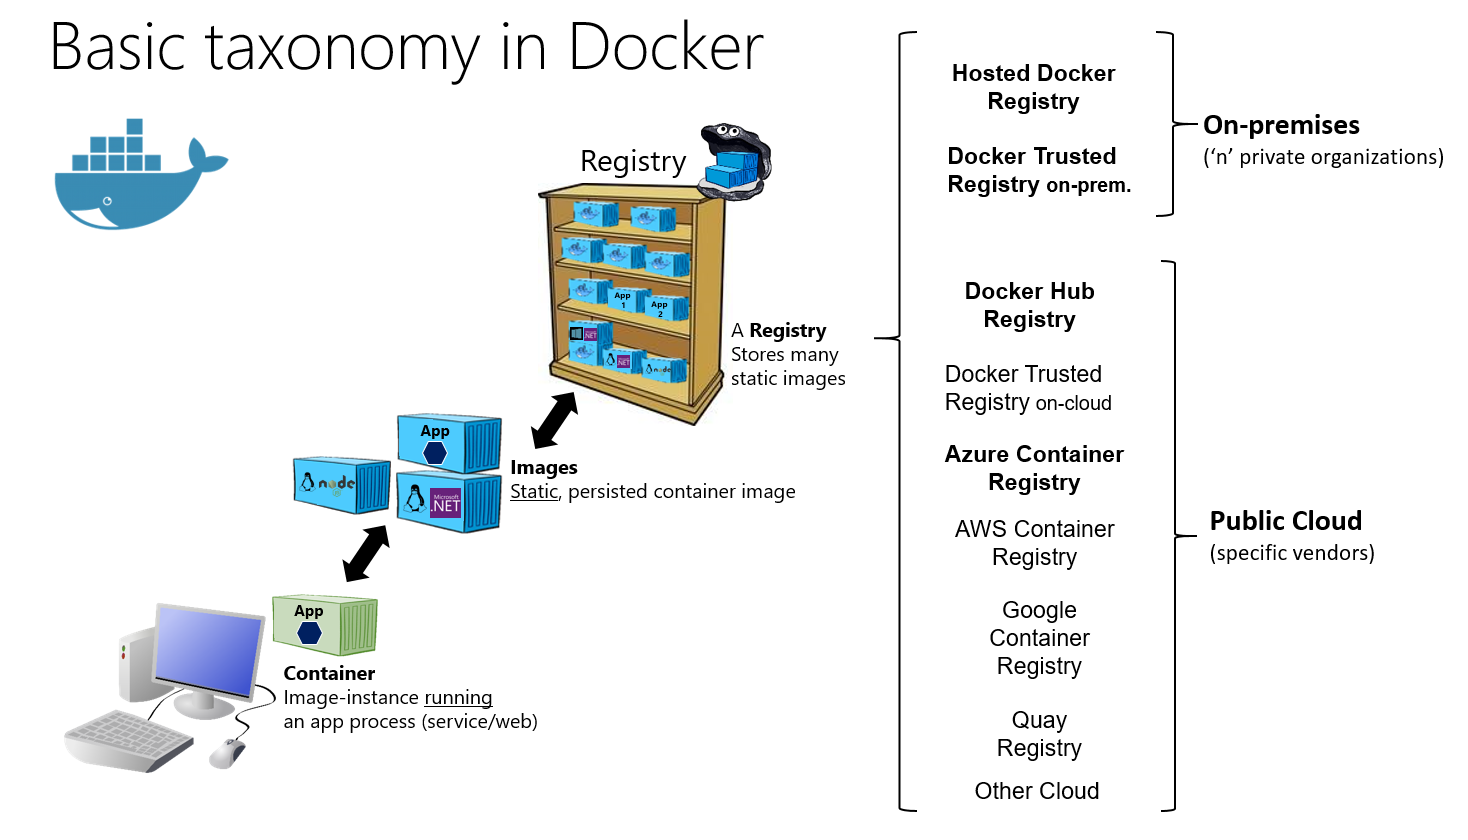

Dockerfile содержит набор инструкций, используемых для создания образа Docker.  
Созданный образ Docker затем можно распространять в реестры (частные и 
общедоступные), развертывать на облачных серверах, таких как AWS и Google Cloud, 
и использовать в разных операционных системах путем создания контейнера. 

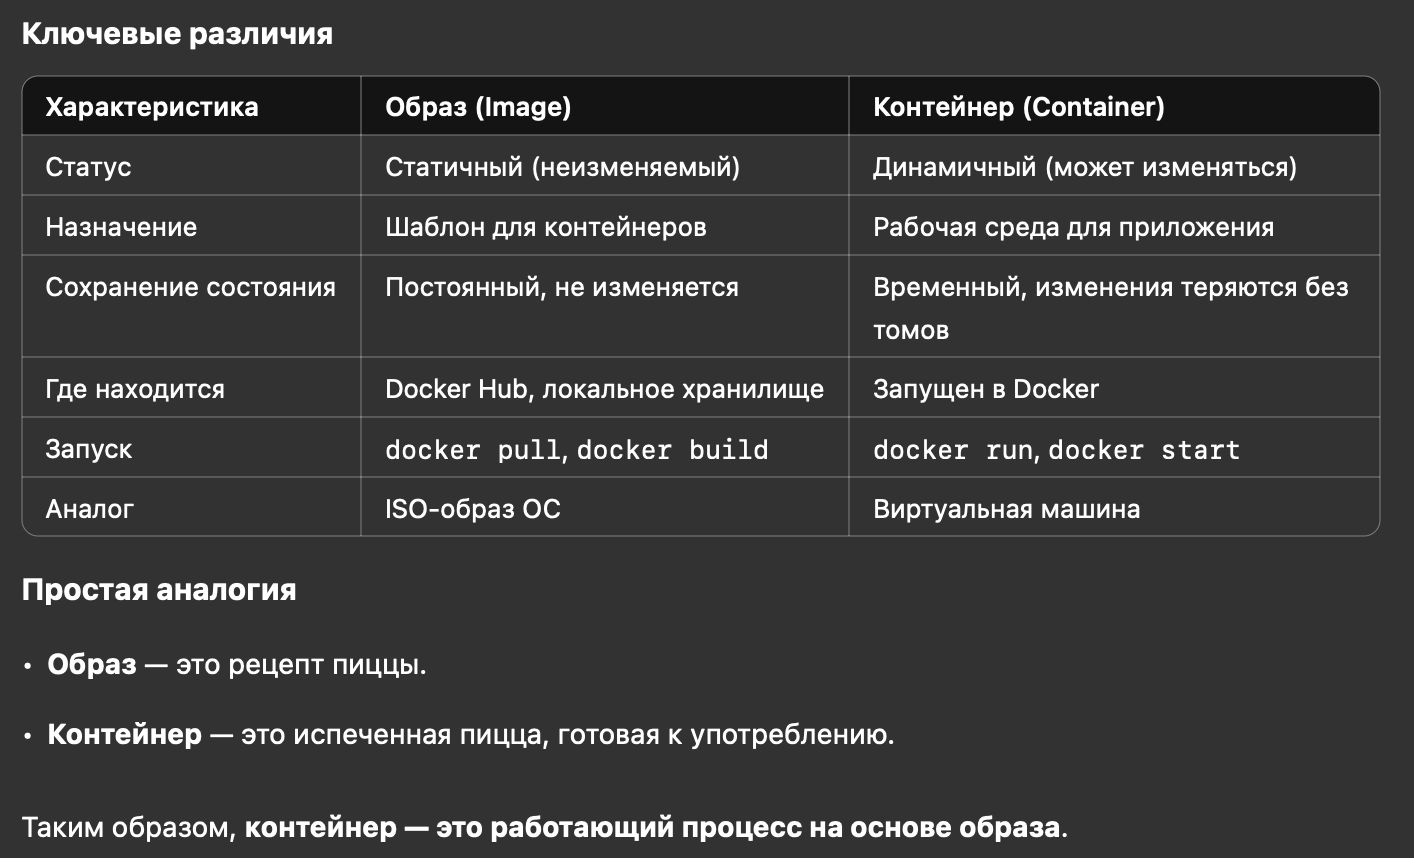

### Dockerfile

В образ контейнера, поверх базового образа, можно добавлять дополнительные слои. Делается это в соответствии с инструкциями из Dockerfile. Например, если Dockerfile описывает образ, который планируется использовать для решения задач машинного обучения, то в нём могут быть инструкции для включения в промежуточный слой такого образа библиотек NumPy, Pandas и Scikit-learn.

И, наконец, в образе может содержаться, поверх всех остальных, ещё один тонкий слой, данные, хранящиеся в котором, поддаются изменению. Это — небольшой по объёму слой, содержащий программу, которую планируется запускать в контейнере.

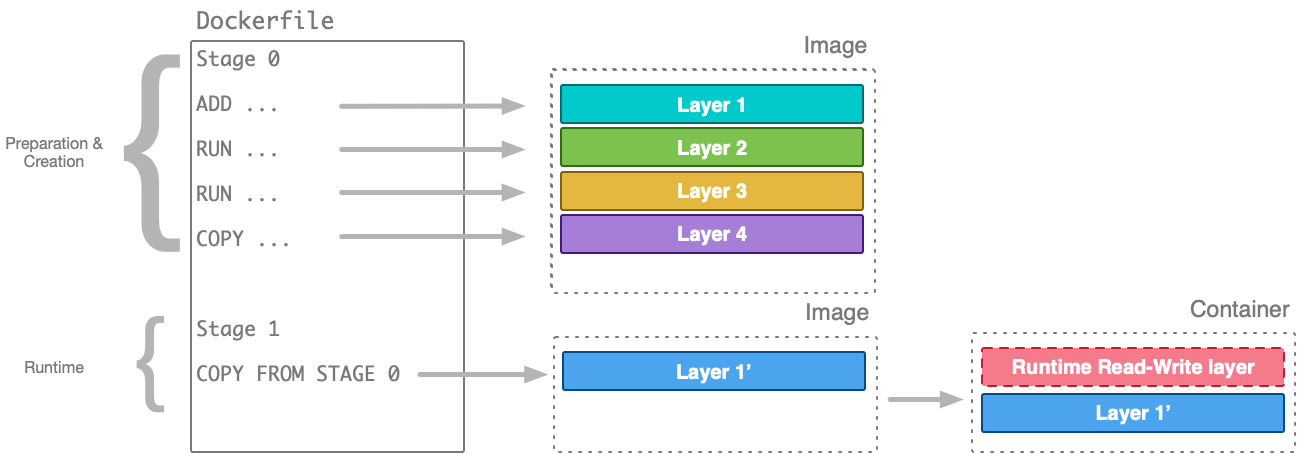

Каждый набор инструкций, перечисленных в Dockerfile, создается как отдельный 
уровень. Docker выполняет интеллектуальную работу по кэшированию каждого 
слоя во время сборки, чтобы сократить время сборки и исключить повторение. Если 
слой, который по сути является инструкцией, остается нетронутым, этот слой 
пропускается и используется ранее созданный. То есть Docker использует систему 
кэширования при сборке образов.

#### Пример Dockerfile

> FROM python:3.10 

> WORKDIR /app

> COPY requirements.txt /app

> RUN pip install --upgrade pip && pip install -r /app/ requirements.txt

> EXPOSE 8080

> COPY ./ /app

> CMD ["python", "main.py"]

- Первая инструкиця  — установить базовый образ для нашего собственного образа с помощью ключевого слова FROM. 
Другие варианты этого образа можно найти по адресу https://hub.docker.com/_/python.   
- WORKDIR используется для задания рабочего каталога /app. Рабочий каталог помогает организовать структуру проекта, построенного на образе.  
- Затем мы копируем файл requirements.txt из локального каталога в рабочий каталог контейнера Docker, используя ключевое слово COPY.   
- Команда RUN, которая используется для обновления пакета pip и последующей установки зависимостей из файла 
requirements.txt.  
- Следующая команда предоставляет ПОРТ, через который к нашему приложению можно получить доступ из локальной сети.   
- Следующая команда копирует остальные файлы и папки в рабочий каталог контейнера Docker.  
- Последняя команда запускает приложение с помощью команды CMD.  

### Сборка контейнера
> docker build -t [name_service] [path_to_Dockerfile]

### Скачивание готового образа
> docker pull mongo

### Запуск контейнер Docker
Для того чтобы запустить контейнер, нам нужен, во-первых, образ контейнера, во-вторых — среда, в которой установлен Docker, способная понять и выполнить команду  
> docker run image_name. 

### Репозиторий контейнеров
Если вы хотите дать возможность другим людям создавать контейнеры на основе вашего образа, вы можете отправить этот образ в облачное хранилище. Самым крупным подобным хранилищем является репозиторий Docker Hub. Он используется при работе с Docker по умолчанию.


### Обычное разделение образов по тегам:

- Стандартный образ Docker: Эти образы обычно основаны на полноценном дистрибутиве Linux, таком как Ubuntu или Debian, и включают широкий спектр предустановленных пакетов и зависимостей. Они, как правило, больше по размеру, чем образы других типов.
- Alpine Linux Docker Image: Alpine Linux - это облегченный дистрибутив Linux, который разработан таким образом, чтобы быть небольшим и безопасным. Образы Docker на базе Alpine обычно намного меньше стандартных образов, поскольку включают в себя только самое необходимое для запуска приложения.
- Slim Docker: Эти изображения похожи на изображения на базе Alpine в том смысле, что они спроектированы так, чтобы быть небольшими и эффективными. Однако они не обязательно основаны на Alpine Linux и могут использовать другие облегченные дистрибутивы Linux, такие как CentOS или Debian. Изображения Slim обычно включают только необходимые пакеты и зависимости для запуска приложения, но все равно могут быть больше, чем изображения на базе Alpine.

## Клиент Docker
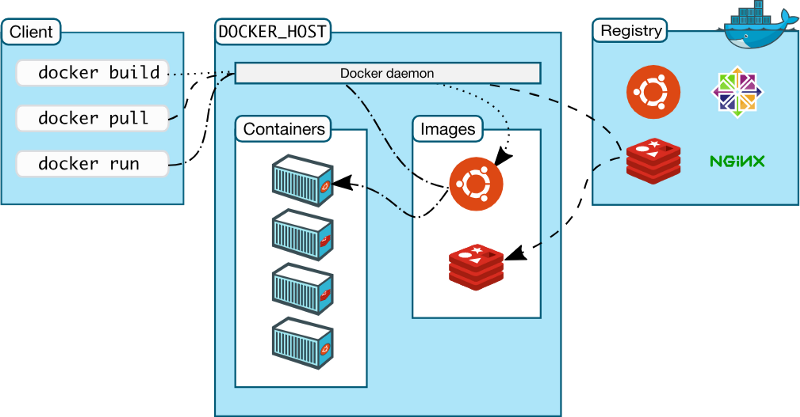

### Краткий перечень терминов
- Платформа Docker — ПО, благодаря которому можно работать с контейнерами.
- Движок Docker — клиент-серверное приложение (CE или Enterprise).
- Клиент Docker — программа, которая позволяет взаимодействовать с демоном Docker посредством CLI.
- Демон Docker — сервер Docker, отвечающий за управление ключевыми механизмами системы.
- Тома Docker — хранилище информации, используемое в контейнерах.
- Реестр Docker — удалённое хранилище образов.
- Хаб Docker — самый крупный реестр Docker, используемый по умолчанию.
- Репозиторий — коллекция образов Docker с одним и тем же именем.

# Docker-compose: краткий обзор

Docker Compose — это инструмент, который упрощает развёртывание приложений, для работы которых требуется несколько контейнеров Docker. Docker Compose позволяет выполнять команды, описываемые в файле docker-compose.yml. Эти команды можно выполнять столько раз, сколько потребуется. Интерфейс командной строки Docker Compose упрощает взаимодействие с многоконтейнерными приложениями. Этот инструмент устанавливается при установке Docker.

### Разница между Docker и Docker Compose

Docker применяется для управления отдельными контейнерами (сервисами), из которых состоит приложение.

Docker Compose используется для одновременного управления несколькими контейнерами, входящими в состав приложения. Этот инструмент предлагает те же возможности, что и Docker, но позволяет работать с более сложными приложениями.


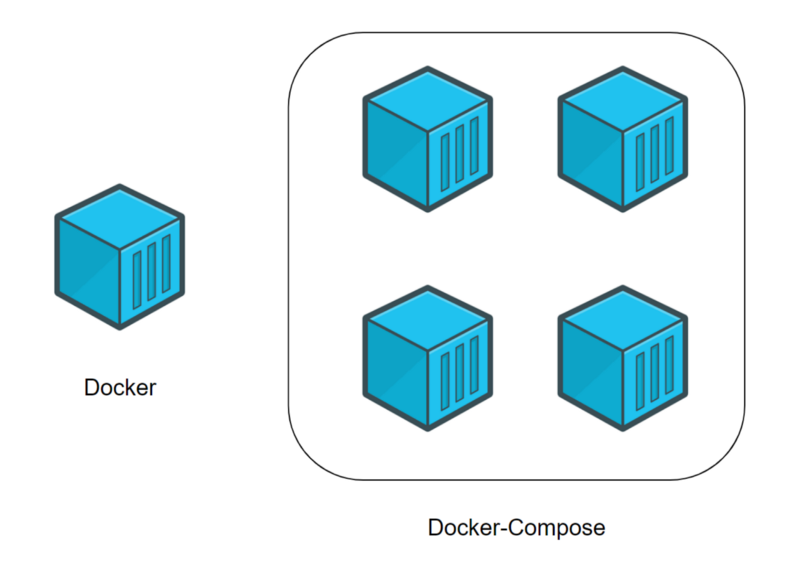

Вот код, который нужно поместить в файл **docker-compose.yml**

In [ ]:
# Файл docker-compose должен начинаться с тега версии.

version: "3"

# Следует учитывать, что docker-composes работает с сервисами.
# 1 сервис = 1 контейнер.
# Сервисом может быть клиент, сервер, сервер баз данных...
# Раздел, в котором будут описаны сервисы, начинается с 'services'.

services:

  # Первый сервис (контейнер): сервер.
  # Назвать его можно так, как нужно разработчику.
  # Понятное название сервиса помогает определить его роль.
  # Здесь мы, для именования соответствующего сервиса, используем ключевое слово 'server'.

  server:
 
    # Ключевое слово "build" позволяет задать
    # путь к файлу Dockerfile, который нужно использовать для создания образа,
    # который позволит запустить сервис.
    # Здесь 'server/' соответствует пути к папке сервера,
    # которая содержит соответствующий Dockerfile.

    build: server/

    # Команда, которую нужно запустить после создания образа.
    # Следующая команда означает запуск "python ./server.py".

    command: python ./server.py

    # Вспомните о том, что в качестве порта в 'server/server.py' указан порт 1234.
    # Если мы хотим обратиться к серверу с нашего компьютера (находясь за пределами контейнера),
    # мы должны организовать перенаправление этого порта на порт компьютера.
    # Сделать это нам поможет ключевое слово 'ports'.
    # При его использовании применяется следующая конструкция: [порт компьютера]:[порт контейнера]
    # В нашем случае нужно использовать порт компьютера 1234 и организовать его связь с портом
    # 1234 контейнера (так как именно на этот порт сервер 
    # ожидает поступления запросов).

    ports:
      - 80:8080

  # Второй сервис (контейнер): клиент.
  # Этот сервис назван 'client'.

  client:
    # Здесь 'client/ соответствует пути к папке, которая содержит
    # файл Dockerfile для клиентской части системы.

    build: client/

    # Команда, которую нужно запустить после создания образа.
    # Следующая команда означает запуск "python ./client.py".
 
    command: python ./client.py

    # Ключевое слово 'network_mode' используется для описания типа сети.
    # Тут мы указываем то, что контейнер может обращаться к 'localhost' компьютера.

    network_mode: host

    # Ключевое слово 'depends_on' позволяет указывать, должен ли сервис,
    # прежде чем запуститься, ждать, когда будут готовы к работе другие сервисы.
    # Нам нужно, чтобы сервис 'client' дождался бы готовности к работе сервиса 'server'.
 
    depends_on:
      - server

    # Ключевое слово 'env_file' позволяет загрузить и передать во внутрь контейнера переменные окружения из файла
    env_file:
    - .env

### Сборка проекта
После того, как в docker-compose.yml внесены все необходимые инструкции, проект нужно собрать. Этот шаг нашей работы напоминает использование команды docker build, но соответствующая команда имеет отношение к нескольким сервисам:

> docker-compose build

### Запуск проекта
Теперь, когда проект собран, пришло время его запустить. Этот шаг нашей работы соответствует шагу, на котором, при работе с отдельными контейнерами, выполняется команда docker run:

> docker-compose up

### Полезные команды
- docker-compose down - Эта команда позволяет останавливать и удалять контейнеры и другие ресурсы, созданные командой docker-compose up
- docker-compose logs -f [service name] - Эта команда выводит журналы сервисов
- docker-compose ps - С помощью такой команды можно вывести список контейнеров
- docker-compose exec [service name] [command] - Данная команда позволяет выполнить команду в выполняющемся контейнере
- docker-compose images - Такая команда позволяет вывести список образов

# Docker Swarm: краткий обзор

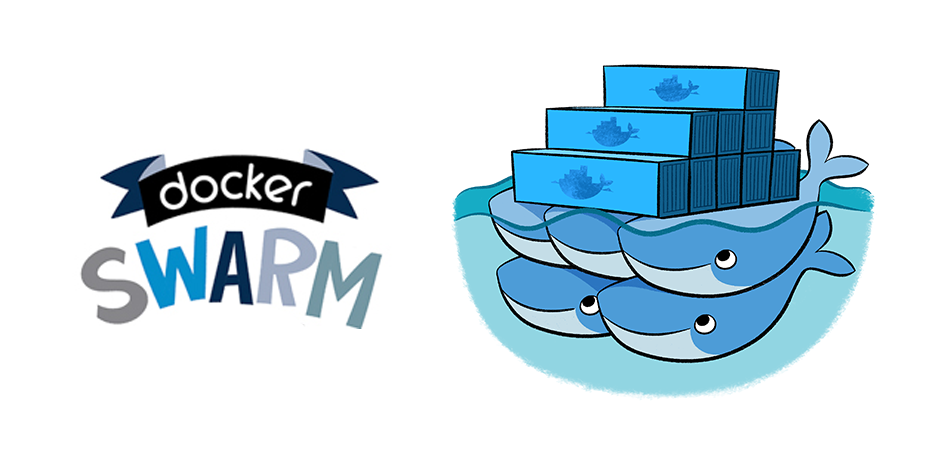

**Docker Swarm** — это встроенный в Docker инструмент для оркестрации контейнеров, который позволяет управлять несколькими Docker-узлами как единым кластером. Swarm обеспечивает автоматическое масштабирование, балансировку нагрузки и отказоустойчивость для контейнеризованных приложений.  

## Основные возможности Docker Swarm  
- **Кластеризация** – объединение нескольких Docker-хостов в единый кластер.  
- **Масштабируемость** – возможность увеличивать или уменьшать количество запущенных контейнеров (реплик).  
- **Балансировка нагрузки** – автоматическое распределение трафика между сервисами.  
- **Отказоустойчивость** – перезапуск упавших контейнеров и перераспределение нагрузки в случае сбоя узлов.  
- **Декларативное управление** – задаем желаемое состояние системы (количество реплик, порты и т. д.), а Swarm автоматически его поддерживает.  

## Ключевые компоненты Docker Swarm  
- **Manager Node** – главный узел кластера, который управляет задачами и распределяет контейнеры.  
- **Worker Node** – рабочие узлы, которые выполняют контейнеры и получают инструкции от Manager.  
- **Services** – долгоживущие контейнеры, управляемые Swarm.  
- **Tasks** – экземпляры контейнеров, запущенные в рамках сервиса.  

## Пример команд для работы с Swarm  

### Инициализация Swarm  
> docker swarm init

### Добавление рабочего узла в кластер 
> docker swarm join --token <TOKEN> <MANAGER-IP>:2377

### Развертывание сервиса в Swarm
> docker service create --name my_web -p 80:80 nginx

Docker Swarm – это простой и встроенный в Docker инструмент для управления контейнерами на нескольких узлах, обеспечивающий надежное развертывание приложений. 🚀

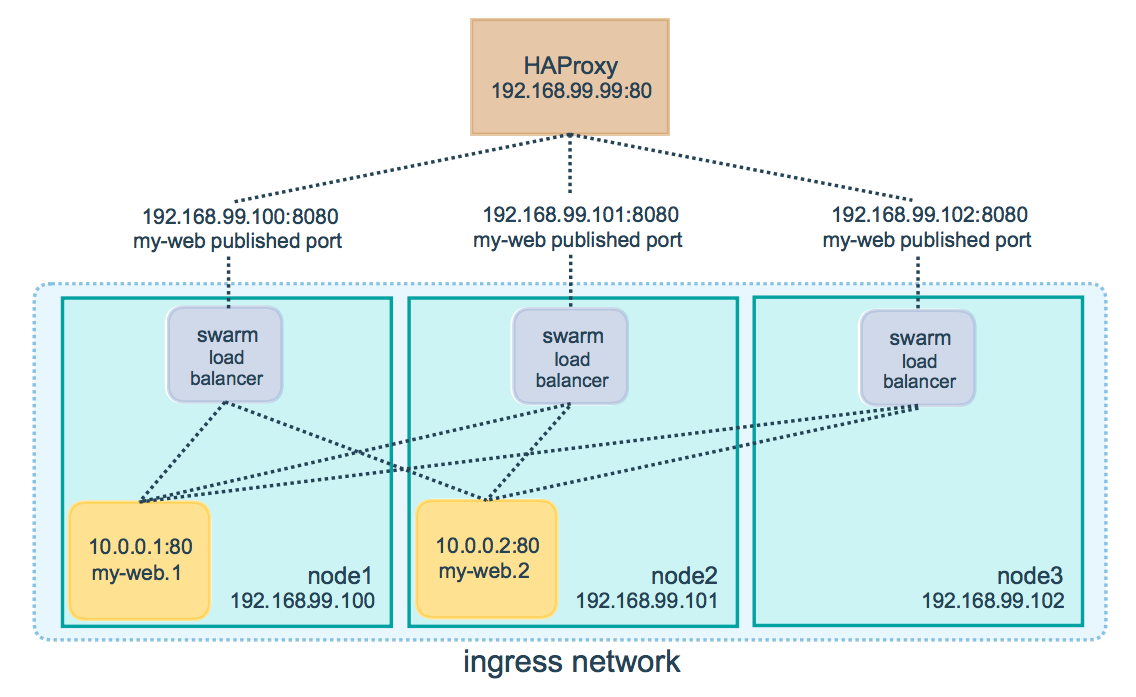

## Плюсы и минусы **Docker Swarm**  

### **Плюсы**  
✅ **Простота** – легкая установка и настройка, интуитивно понятные команды.  
✅ **Встроен в Docker** – не требует дополнительной установки, работает "из коробки".  
✅ **Быстрое развертывание** – кластеры и сервисы можно создать за считанные минуты.  
✅ **Производительность** – меньше накладных расходов, чем у Kubernetes, благодаря более легковесной архитектуре.  
✅ **Легкость управления** – удобен для небольших и средних проектов.  

### **Минусы**  
❌ **Ограниченные возможности** – слабее в плане управления сетями, логирования и мониторинга.  
❌ **Менее развитая экосистема** – меньше инструментов и интеграций, чем у Kubernetes.  
❌ **Слабая автоматизация** – менее гибкая система масштабирования и обновлений.  
❌ **Низкая отказоустойчивость** – не так хорошо справляется с высокими нагрузками и сбоями, как Kubernetes.  

---

## **Вывод**  
- **Docker Swarm** подходит для небольших и средних проектов, где важны простота и скорость развертывания.  

# Kubernetes: краткий обзор  

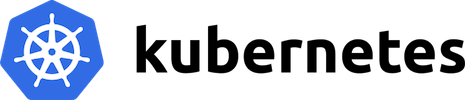

**Kubernetes** (K8s) — это мощная платформа для оркестрации контейнеров, разработанная для автоматического управления, масштабирования и развертывания контейнеризированных приложений. Она позволяет эффективно управлять кластерами контейнеров в распределенных средах, обеспечивая отказоустойчивость и высокую доступность сервисов.  

## Основные возможности Kubernetes  
- **Автоматическое масштабирование** – Kubernetes увеличивает или уменьшает количество реплик в зависимости от нагрузки.  
- **Самовосстановление** – при сбое контейнера Kubernetes автоматически его перезапускает.  
- **Балансировка нагрузки** – распределяет трафик между контейнерами для равномерной загрузки.  
- **Декларативное управление** – описываем желаемое состояние системы (в манифестах YAML), а Kubernetes поддерживает его автоматически.  
- **Оркестрация сетей** – поддержка сложных сетевых конфигураций, межсервисного взаимодействия и политик безопасности.  

## Ключевые компоненты Kubernetes  
- **Pod** – минимальная единица развертывания, содержащая один или несколько контейнеров.  
- **Node** – физический или виртуальный сервер, на котором работают поды.  
- **Cluster** – объединение узлов (Node) под управлением Kubernetes.  
- **Deployment** – объект для управления развертыванием и обновлением подов.  
- **Service** – определяет, как приложения внутри кластера взаимодействуют друг с другом.  
- **Ingress** – маршрутизирует HTTP/HTTPS-запросы к нужным сервисам.  

## Пример запуска пода  
```yaml
apiVersion: v1
kind: Pod
metadata:
  name: my-pod
spec:
  containers:
    - name: my-container
      image: nginx
      ports:
        - containerPort: 80

<img src='https://myeditor.ru/wp-content/uploads/d/c/c/dcc32f31a25f10c62418f1065de19b83.png'></img>

## Плюсы и минусы **Kubernetes**  

### **Плюсы**  
✅ **Гибкость и масштабируемость** – подходит для больших распределенных систем.  
✅ **Автоматизация** – умное управление ресурсами, самовосстановление подов и автоматическое масштабирование.  
✅ **Богатая экосистема** – поддержка множества облачных провайдеров и инструментов DevOps.  
✅ **Расширенная работа с сетью** – мощная система балансировки нагрузки и сетевых политик.  
✅ **Отказоустойчивость** – высокая надежность и стабильность.  

### **Минусы**  
❌ **Сложность** – сложная настройка и высокие требования к обучению.  
❌ **Высокие ресурсы** – требует больше вычислительных мощностей и памяти.  
❌ **Долгое развертывание** – сложнее развернуть кластер по сравнению с Docker Swarm.  
❌ **Затраты на поддержку** – требует дополнительных ресурсов и экспертизы для администрирования.  

---

## **Вывод**  
- **Kubernetes** – мощный инструмент для сложных, масштабируемых систем с высокими требованиями к отказоустойчивости и автоматизации.  